<a href="https://colab.research.google.com/github/Nikithm-315/P-2/blob/main/lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Basic Python and Pandas Concepts

In every python code, we have to import relavant libraries that we are working with. Otherwise, we cannot use any of the funnctions from these libraries!!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here are some of the common data types that we commonly work with in this class:
python lists, python dictionaries:

In [3]:
#some example lists:
name_list = ["Marie", "Albert", "Grace", "Donald", "Joe", "Joe"]
last_name_list = ["Curie","Einstein", "Hopper", "Trump","Biden","Jonas"]
place_of_birth_list = ["Poland","Germany","USA","USA", "USA", "USA"]
gender_list = ["F", "M", "F", "M", "M", "M"]
height_list = [155, 160, 165, 170, 175, 160]
age_list = [66,76,85,77,80, 34]

#example python dictionary. The keys in this dictionary are name, last_name, place_of_birth, and age. The values are the lists above.
#The values in a python dict can be any data type, not just lists!

data_dict = {"name": name_list, "last_name":last_name_list, "place_of_birth":place_of_birth_list, "age":age_list, "gender":gender_list, "height":height_list}


The cool thing about python dictionaries is that given a key, you can get the values back!

In [4]:
data_dict["name"]

['Marie', 'Albert', 'Grace', 'Donald', 'Joe', 'Joe']

Let's convert out dictionariy to tabular data! we will use pandas library in all of our homework assignments so make sure you are comfortable using it.

In [8]:
df1 = pd.DataFrame(data_dict)

### 1- getting to know our dataset

In [9]:
#let's print all of the table
df1

,name,last_name,place_of_birth,age,gender,height
0,Marie,Curie,Poland,66,F,155
1,Albert,Einstein,Germany,76,M,160
2,Grace,Hopper,USA,85,F,165
3,Donald,Trump,USA,77,M,170
4,Joe,Biden,USA,80,M,175
5,Joe,Jonas,USA,34,M,160


In [7]:
#let's print thee first 3 rows
print(df1.head(3))

     name last_name place_of_birth  age gender  height
0   Marie     Curie         Poland   66      F     155
1  Albert  Einstein        Germany   76      M     160
2   Grace    Hopper            USA   85      F     165


In [10]:
#let's see all of the values present in the place_of_birth column and the number of occurances for each unique value:
df1['place_of_birth'].value_counts()

USA        4
Poland     1
Germany    1
Name: place_of_birth, dtype: int64

In [11]:
#this method gives us some stats about the numerical columns
df1.describe()

,age,height
count,6.000000,6.000000
mean,69.666667,164.166667
std,18.554424,7.359801
min,34.000000,155.000000
25%,68.500000,160.000000
50%,76.500000,162.500000
75%,79.250000,168.750000
max,85.000000,175.000000


In [12]:
df1.columns

Index(['name', 'last_name', 'place_of_birth', 'age', 'gender', 'height'], dtype='object')

### 2- Subsetting pandas dataframe

In [13]:
#subsetting by column name
print(df1['last_name'])

0       Curie
1    Einstein
2      Hopper
3       Trump
4       Biden
5       Jonas
Name: last_name, dtype: object


In [14]:
#note that the data type of the subset that we get using the format above returns a series
type(df1['name'])

pandas.core.series.Series

In [15]:
#alternatively you can also do it using the method below:
print(df1.last_name)

0       Curie
1    Einstein
2      Hopper
3       Trump
4       Biden
5       Jonas
Name: last_name, dtype: object


In [16]:
#multiple columns subsetting
print(df1[['name', 'last_name']])

     name last_name
0   Marie     Curie
1  Albert  Einstein
2   Grace    Hopper
3  Donald     Trump
4     Joe     Biden
5     Joe     Jonas


In [17]:
#subsetting by column index
df1.iloc[:, 0]

0     Marie
1    Albert
2     Grace
3    Donald
4       Joe
5       Joe
Name: name, dtype: object

In [18]:
#subsetting by row index
df1.iloc[0, :]

name               Marie
last_name          Curie
place_of_birth    Poland
age                   66
gender                 F
height               155
Name: 0, dtype: object

In [19]:
# you can select multiple columns or rows using the indexing method. This returns a new data frame. no longer a series
df1.iloc[0:2, 2:5]

,place_of_birth,age,gender
0,Poland,66,F
1,Germany,76,M


Condition/Boolean subsetting:

In [20]:
df1[df1["place_of_birth"] == "USA"]

,name,last_name,place_of_birth,age,gender,height
2,Grace,Hopper,USA,85,F,165
3,Donald,Trump,USA,77,M,170
4,Joe,Biden,USA,80,M,175
5,Joe,Jonas,USA,34,M,160


In [21]:
df1[df1["age"]<=66]

,name,last_name,place_of_birth,age,gender,height
0,Marie,Curie,Poland,66,F,155
5,Joe,Jonas,USA,34,M,160


## 3- Grouping data based on shared values

In [22]:
#let's group all the people in our dataframe based on their country of birth.
#For example, we expect all people from USA to somehow end up together.
# in the example below, we say hey, give me a list of names for all people with the same place of birth.
df1.groupby("place_of_birth").agg({'name':list})

,name
place_of_birth,
Germany,[Albert]
Poland,[Marie]
USA,"[Grace, Donald, Joe, Joe]"


In the code above, we are grouping rows of data based on place of birth, and we are aggregating the names column as a list. For aggregation, there are other possibilities. For example, we can sum all the numeric values, find the min, max etc. There are different ways that we can aggregate these grouped rows.

In [23]:
#here we say give me the smallest age from all the people from the same country:
df1.groupby("place_of_birth").agg({'age':min})

,age
place_of_birth,
Germany,76
Poland,66
USA,34


In [24]:
# groupby more than one column.print the mean of other vals (that are numeric)
means = df1.groupby(['place_of_birth', 'gender']).mean(numeric_only=True)
means

age      height
place_of_birth gender                       
Germany        M       76.000000  160.000000
Poland         F       66.000000  155.000000
USA            F       85.000000  165.000000
               M       63.666667  168.333333

In [25]:
#you can use size function to get the size of each created group
df1.groupby(['place_of_birth', 'gender']).size()

place_of_birth  gender
Germany         M         1
Poland          F         1
USA             F         1
                M         3
dtype: int64

more info: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

## 4- Merging two dataframes

In [27]:
#let's create a second dataframe
df2 = pd.DataFrame({"name": ["Joe", "Albert"],"last_name":["Biden", "Einstein"],"job":["president", "physicist"]})

In [28]:
df2

,name,last_name,job
0,Joe,Biden,president
1,Albert,Einstein,physicist


In [29]:
df1

,name,last_name,place_of_birth,age,gender,height
0,Marie,Curie,Poland,66,F,155
1,Albert,Einstein,Germany,76,M,160
2,Grace,Hopper,USA,85,F,165
3,Donald,Trump,USA,77,M,170
4,Joe,Biden,USA,80,M,175
5,Joe,Jonas,USA,34,M,160


We want to merge df2 with our original dataframe df1 so that we have job information as well. We have only job informationn for Joe Biden and Albert Einstein, so for other people the value should be NaN.

We want a new merged dataframe for all of the peeople in our original dataframe df1. So, by performing a "left" join, we can keep all rows of the first dataframe and add information to it from the second dataframe df2.

In [30]:

df3 = df1.merge(df2, how="left", on="name")
print(df3)

     name last_name_x place_of_birth  age gender  height last_name_y  \
0   Marie       Curie         Poland   66      F     155         NaN   
1  Albert    Einstein        Germany   76      M     160    Einstein   
2   Grace      Hopper            USA   85      F     165         NaN   
3  Donald       Trump            USA   77      M     170         NaN   
4     Joe       Biden            USA   80      M     175       Biden   
5     Joe       Jonas            USA   34      M     160       Biden   

         job  
0        NaN  
1  physicist  
2        NaN  
3        NaN  
4  president  
5  president  


Note that we have specified the merging to occur only based on "name" and not both first names and last names. Thus, Joe Biden and Joe Jonas will be both presidents!!
Since Joe jonas is obviously not a president, we have to further specify requirements for joining the dataframes.

Additionally, since column "last_name" is present in both dataframes df1 and df2, two columns "last_name_x" and "last_name_y" have been created to distinguish these two columns with the same name from one another.

Let's fix the presidency problem of Joe Jonas:

In [32]:
df3 = df1.merge(df2, how="left", on=["name", "last_name"])
print(df3)

     name last_name place_of_birth  age gender  height        job
0   Marie     Curie         Poland   66      F     155        NaN
1  Albert  Einstein        Germany   76      M     160  physicist
2   Grace    Hopper            USA   85      F     165        NaN
3  Donald     Trump            USA   77      M     170        NaN
4     Joe     Biden            USA   80      M     175  president
5     Joe     Jonas            USA   34      M     160        NaN


In the cell above, because we are passing more than one column to the "on=" field, we have to create a list of columns. Otherwise we will run into an error.

Below, you can see what would happen if we do a right join on df1 with df2. In that case, our new merged dataframe will contain all rows of df2 plus any additional information that we gather from df1.

In [33]:
merged_df1= df1.merge(df2, how="right", on=["name", "last_name"])


In [34]:
merged_df1

,name,last_name,place_of_birth,age,gender,height,job
0,Joe,Biden,USA,80,M,175,president
1,Albert,Einstein,Germany,76,M,160,physicist


In [35]:
merged_df2= df2.merge(df1, how = "left", on = ["name","last_name"])

In [36]:
merged_df2

,name,last_name,job,place_of_birth,age,gender,height
0,Joe,Biden,president,USA,80,M,175
1,Albert,Einstein,physicist,Germany,76,M,160


In [37]:
merged_df1.equals(merged_df2)

False

What can you do to make the equals() function return True for merged_df1 and merged_df2 (hint: re-arrange the columns!)

In [ ]:
#around 2 lines of code expected

## 5- Transposing a dataframe

In [38]:
df2

,name,last_name,job
0,Joe,Biden,president
1,Albert,Einstein,physicist


In [39]:
df5 = df2.T

In [40]:
df5

,0,1
name,Joe,Albert
last_name,Biden,Einstein
job,president,physicist


## 6- Renaming columns

In [41]:
df5.rename(columns={0: "person_1", 1: "person_2"}, inplace=True)


In [42]:
df5

,person_1,person_2
name,Joe,Albert
last_name,Biden,Einstein
job,president,physicist


## 7- Performing operations on data using pandas columns!

### anonymous functions

In [43]:
#lambda is used to define anonymous functions in python
# here the input to function is x, the function adds 100 to the input and returns it.
df1['age'].apply(lambda x: x+100)


0    166
1    176
2    185
3    177
4    180
5    134
Name: age, dtype: int64

In [44]:
df1['fake_age'] = df1['age'].apply(lambda x: x+100)


In [45]:
df1

,name,last_name,place_of_birth,age,gender,height,fake_age
0,Marie,Curie,Poland,66,F,155,166
1,Albert,Einstein,Germany,76,M,160,176
2,Grace,Hopper,USA,85,F,165,185
3,Donald,Trump,USA,77,M,170,177
4,Joe,Biden,USA,80,M,175,180
5,Joe,Jonas,USA,34,M,160,134


In [46]:
#we can define our own functions, and then use them on dataframe values.

def add_100(x):
  return x+100

df1['age'].apply(add_100)


0    166
1    176
2    185
3    177
4    180
5    134
Name: age, dtype: int64

In [47]:
#in some cases, can use vectorized operations (faster than apply method)

df1['very_fake_age'] = df1['age']+df1['fake_age']



In [48]:
df1


,name,last_name,place_of_birth,age,gender,height,fake_age,very_fake_age
0,Marie,Curie,Poland,66,F,155,166,232
1,Albert,Einstein,Germany,76,M,160,176,252
2,Grace,Hopper,USA,85,F,165,185,270
3,Donald,Trump,USA,77,M,170,177,254
4,Joe,Biden,USA,80,M,175,180,260
5,Joe,Jonas,USA,34,M,160,134,168


### Sorting values

In [49]:
df1.sort_values(by='age', ascending = False)

,name,last_name,place_of_birth,age,gender,height,fake_age,very_fake_age
2,Grace,Hopper,USA,85,F,165,185,270
4,Joe,Biden,USA,80,M,175,180,260
3,Donald,Trump,USA,77,M,170,177,254
1,Albert,Einstein,Germany,76,M,160,176,252
0,Marie,Curie,Poland,66,F,155,166,232
5,Joe,Jonas,USA,34,M,160,134,168


## 8- Visualization Examples

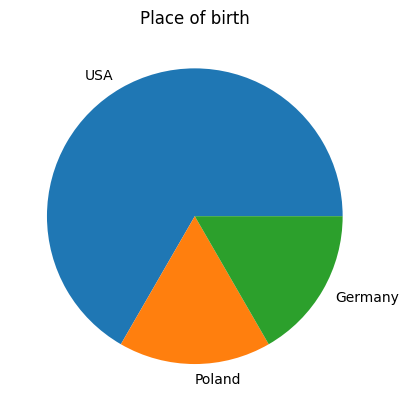

In [50]:
#let's create piechart of people based on their place of birth
plt.pie(df1['place_of_birth'].value_counts(), labels=df1['place_of_birth'].value_counts().index)
plt.title("Place of birth")
plt.show()

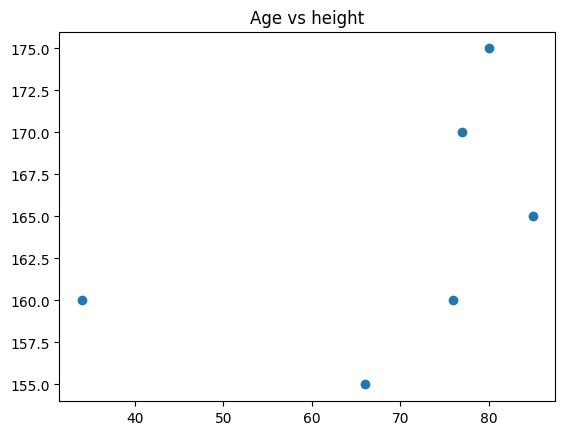

In [51]:
#let's create a scatter plot based on age and height
plt.scatter(df1['age'], df1['height'])
plt.title("Age vs height")
plt.show()


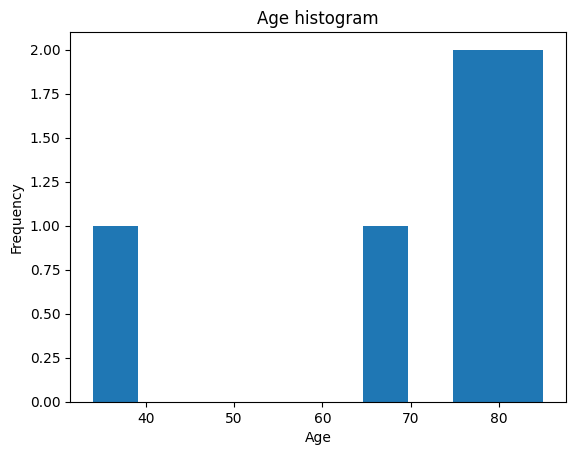

In [52]:
#let's create a histogram based on age
plt.hist(df1['age'])
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

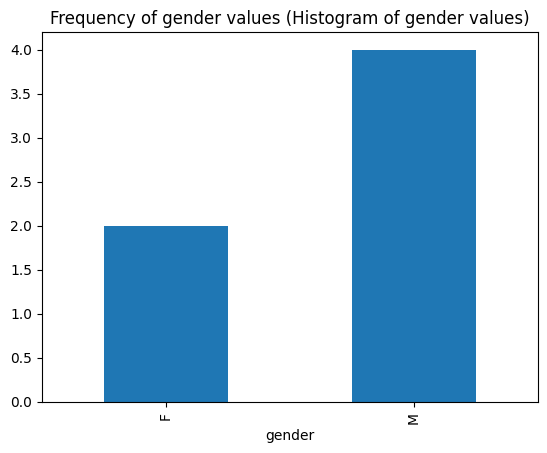

In [53]:
# plotting
counts = df1.groupby('gender').size()
plt.figure()
counts.plot.bar(title='Frequency of gender values (Histogram of gender values)')
plt.show()

### 9- Importing and Exporting Files

In [54]:
#example of writing to a csv file
#check that the file has been written to files folder on the left hand-side bar
df1.to_csv("df1.csv")

In [55]:
#example of readinng from a csv file
mydf = pd.read_csv("sample_data/mnist_test.csv")

In [56]:
mydf.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#example of writing to a text file
#confirm that the file has been created.
with open(r"python_love.txt", "w+") as f:
    f.write("I love our big data class! :D ")


In [58]:
#example of reading from a text file
with open(r"python_love.txt", "r") as f:
    lines = f.read()

In [59]:
lines

'I love our big data class! :D '

There are tons and tons of possibilities with python. It is impossible to showcase them all here, but these were some basics. You can always find some interesting possibilities when looking in documentations.

For more pandas dataframe functions, please refer to the documentations: https://pandas.pydata.org/docs/user_guide/index.html

## Practice Time

Anscombe's quartet

You have the Anscombe's quartet dataset under the sample data folder in this colab. There are different Series in this dataset.
Let's load the dataset into a dataframe

In [ ]:
# 1 line of code expected

Let's print basic descriptive statistics for each series. Output the mean and standard deviation for both X and Y in each series.

In [ ]:
# 3 lines of code expected (could vary depending on your style and approach)

What do you see? How do the results compare?

Now, let's plot a scatterplot for each series in our dataset.

In [ ]:
# about 6-10 lines of code expected (could vary depending on your style and approach)

Now you see why visualization matters! :)